# Face Recognition Application

### Project by Vijay Chary.A

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('vegita.jpg')

In [3]:
print(image.shape)

(1080, 1920, 3)


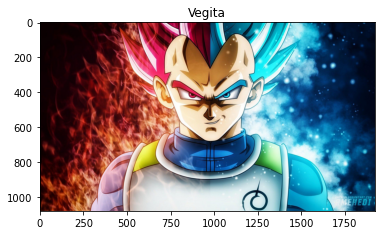

In [191]:
#why do we even have to use 'cv2.COLOR_BGR2RGB' here?
#this is becuase of a bug in jupyter notebook that actually reads an image in BGR(Blue, Green, Red)
#rather than in RGB(Red, Green, Blue), which is standard

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Vegita")
plt.show()

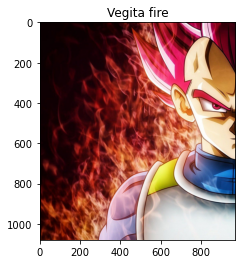

In [31]:
#left crop of vegita

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image[:, :970])
plt.title("Vegita fire")
plt.show()

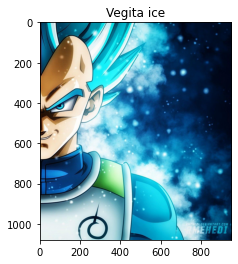

In [33]:
#right crop of vegita

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image[:, 970:])
plt.title("Vegita ice")
plt.show()

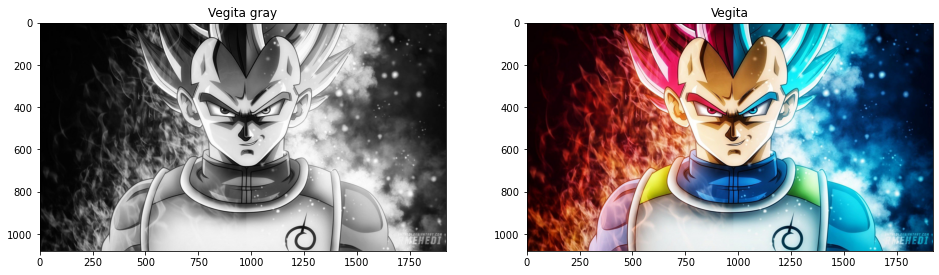

In [219]:
#gray scaling an image and comparing with actual image

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title("Vegita gray")

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title("Vegita")

plt.show()

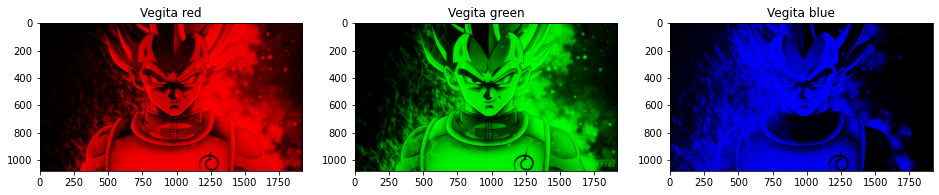

In [220]:
#filtering/separating/splitting the r,g,b channels of an image

zeros = np.zeros((image.shape[0], image.shape[1]), np.uint8)
b, g, r = cv2.split(image)

red = cv2.merge([r, zeros, zeros])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([zeros, zeros, b])

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.imshow(red)
plt.title("Vegita red")

plt.subplot(1, 3, 2)
plt.imshow(green)
plt.title("Vegita green")

plt.subplot(1, 3, 3)
plt.imshow(blue)
cv2.imwrite("123.jpg", red)
plt.title("Vegita blue")

#cv2.imwrite is used to save the new image as "Greenimage.jpg" in the current directory 
cv2.imwrite("Greenimage.jpg", green)

plt.show()

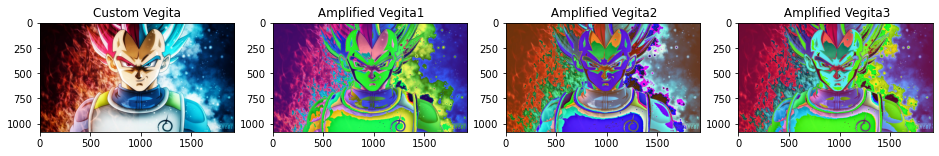

In [222]:
#merge the r,g,b channels to make a new custom image, which is copy of the original image
#amplifiy(changing the r,g,b values) the image to observe change in the image

custom_image = cv2.merge([r, g, b])
amplified_custom_image1 = cv2.merge([r+100,g+10,b+50])
amplified_custom_image2 = cv2.merge([r+10,g+50,b+100])
amplified_custom_image3 = cv2.merge([r+50,g+10,b+100])

plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB))
plt.title("Custom Vegita")

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(amplified_custom_image1, cv2.COLOR_BGR2RGB))
plt.title(" Amplified Vegita1")

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(amplified_custom_image2, cv2.COLOR_BGR2RGB))
plt.title(" Amplified Vegita2")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(amplified_custom_image3, cv2.COLOR_BGR2RGB))
plt.title(" Amplified Vegita3")

plt.show()

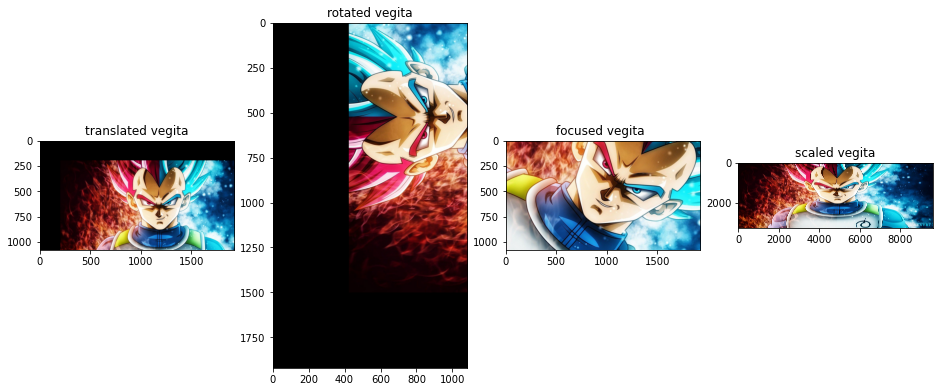

In [119]:
#Affine transformations of an image - translate, rotate, focus, scale
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
height, width, channels = image.shape

# Affine Matrices
translated_mattrix = np.float32([[1, 0, 200], [0, 1, 200]])
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
rfocused_matrix = cv2.getRotationMatrix2D((width/2, height/2), -40, 2) #rotating to -40 degree and focusing the image

# Affine transformation
translated_image = cv2.warpAffine(image, translated_mattrix, (width, height))
rotated_image = cv2.warpAffine(image, rotation_matrix, (height, width))
focused_image = cv2.warpAffine(image, rfocused_matrix, (width, height))
scaled_image = cv2.resize(image, None, fx=5, fy=3)

plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(translated_image)
plt.title("translated vegita")

plt.subplot(1, 4, 2)
plt.imshow(rotated_image)
plt.title("rotated vegita")

plt.subplot(1, 4, 3)
plt.imshow(focused_image)
plt.title("focused vegita ")

plt.subplot(1, 4, 4)
plt.imshow(scaled_image)
plt.title("scaled vegita")

#saving the focused image to current directory
#using cv2.cvtColor, just to make sure jupyter won't act weired and save image in BGR
cv2.imwrite("focused.jpg", cv2.cvtColor(focused_image, cv2.COLOR_BGR2RGB))

plt.show()

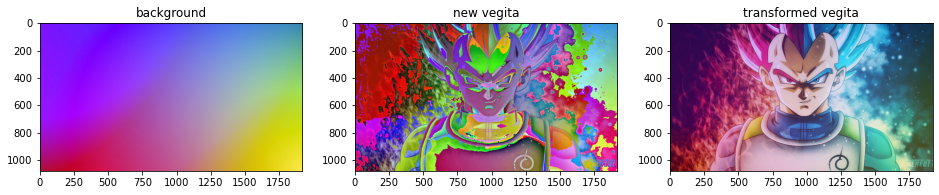

In [132]:
#blending two images - actual image with a backgorund image
#adding matrices(pixel values of images) will totally change the image, hence we used blending to differentiate in better

image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('background.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

add_image = image1 + image2
blended_image = cv2.addWeighted(image1, 0.7, image2, 0.3, gamma=0.1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("background")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(add_image, cv2.COLOR_BGR2RGB))
plt.title("new vegita")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title("transformed vegita")

plt.show()

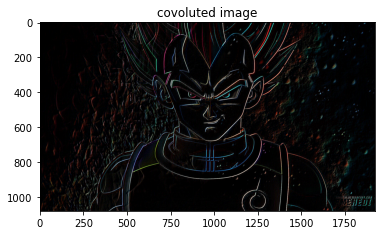

In [158]:
#convolution of an image

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel = np.float32([[1, 0, 0],
                     [0, 1, 1],
                     [1, 1, -5]])

conv_image = cv2.filter2D(image, -1, kernel)

plt.imshow(conv_image)
plt.title("covoluted image")

plt.show()

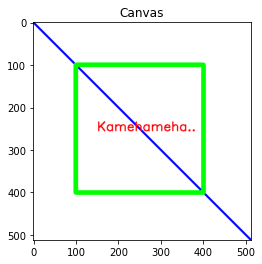

In [20]:
#creating our own canvas and doing some casual drawing

canvas = np.zeros((512,512, 3), np.uint8)
canvas.fill(255)                                              #fill(255) is used to fill the canvas with white background.
cv2.line(canvas, (0, 0), (511, 511), (0, 0, 255), 3)
cv2.rectangle(canvas, (100, 100), (400, 400), (0, 255, 0), 10)
cv2.putText(canvas, "Kamehameha..", 
    (150, 255),
    cv2.FONT_HERSHEY_SIMPLEX,
    1, 
    (255, 0, 0), 2)

plt.imshow(canvas)
plt.title("Canvas")
plt.show()

## Here comes the fun part(vidoes part), time for some action

In [3]:
#creating videoCapture object and rendering cars3 movie final race clip

capture = cv2.VideoCapture('Cars3.mp4')

while True:
    flag, frame = capture.read()
    if not flag:
        print('Could not access the video')
        break
    cv2.imshow('Final battle', frame)
    # use waitkey(25) for normal speedplay
    k = cv2.waitKey(1)
    if k == ord('q'):
        break


capture.release()
cv2.destroyAllWindows()

In [4]:
#rendering cars3 movie final race clip into two frames, actual color frame and gray frame

capture = cv2.VideoCapture('Cars3.mp4')

while capture.isOpened():
    sucess, frame = capture.read()
    #print(sucess)
    if sucess:
        #print("Mahola! We got the video.")
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Gray Frame', gray_frame)
        cv2.imshow('Color Frame', frame)

        k = cv2.waitKey(1)
        #if k & 0xff == ord('q'):
        if k == ord('q'):
            break
    else:
        print("Good bye!")
        break

capture.release()
cv2.destroyAllWindows()

In [5]:
#creating videoCapture object as capture and accessing web-cam

capture = cv2.VideoCapture(0)

while True:
    flag, frame = capture.read()
    if not flag:
        print('Could not access the camera')
        break
    cv2.imshow('My cam', frame)
    k = cv2.waitKey(1)
    if k == ord('q'):
        break


capture.release()
cv2.destroyAllWindows()

In [227]:
#accessing web-cam in two frames, normal frame and gray frame

capture = cv2.VideoCapture(0)

while capture.isOpened(): #capture.isOpended is nothing but True
    sucess, frame = capture.read()
    #print(sucess)
    if sucess:
        #print("Mahola! We got the video.")
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Gray Frame', gray_frame)
        cv2.imshow('Color Frame', frame)

        k = cv2.waitKey(25)
        #if k & 0xff == ord('q'):
        if k == ord('q'):
            break
    else:
        print("Good bye!")
        break

capture.release()
cv2.destroyAllWindows()

In [6]:
#blending image into video frame

capture = cv2.VideoCapture(0)
image = cv2.imread('vegita.jpg')

while True:
    flag, frame = capture.read()
    if not flag:
        print('Could not access the webcam')
        break
    image = cv2.resize(image, (frame.shape[1], frame.shape[0]))
    blended_frame = cv2.addWeighted(frame, 0.7, image, 0.3, gamma=0.1)
    cv2.imshow('Blendedd Frame', blended_frame)
    if cv2.waitKey(10) & 0xff == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

In [7]:
#accessing webcam and displaying name on the video frame

capture = cv2.VideoCapture(0)

while capture.isOpened():
    flag, frame = capture.read()
    if not flag:
        print('Could not access the webcam')
        break
    
    cv2.putText(frame, 'Vijay',
                (261, 157),
                 cv2.FONT_HERSHEY_DUPLEX, 2,
                 (225, 0, 0)
                )
    cv2.rectangle(frame, (180, 100), (500, 200), (0, 255, 0), 2)
    
    cv2.imshow('frame', frame)
    if cv2.waitKey(10) & 0xff == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

## Face Detection using mediapipe library

In [29]:
#computer vission - face detection, face mashing,
#selfie segementation, background change, picture classssification

In [3]:
import mediapipe as mp

In [4]:
#Face detection

#Drawing utility, used to draw the face coordinate on to the video frame
mp_drawing = mp.solutions.drawing_utils
#Face detection utility
mp_face_detectiion = mp.solutions.face_detection

#Model for detecting the face coordinates
model_detection = mp_face_detectiion.FaceDetection()

capture = cv2.VideoCapture(0)

while capture.isOpened():
    flag, frame = capture.read()
    if not flag:
        print('Could not access the webcam')
        break
    
    results = model_detection.process(frame)
    if results.detections:
        for landmark in results.detections:
            mp_drawing.draw_detection(frame, landmark)
        #print(results.detections)
        cv2.imshow('frame', frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break

capture.release()
cv2.destroyAllWindows()

In [11]:
#Face mesh

#Drawing utility, used to draw the face mesh on to the video frame
mp_drawing = mp.solutions.drawing_utils
#Face mesh utility
mp_face_mesh = mp.solutions.face_mesh

#drawing specifications
drawing_spec = mp_drawing.DrawingSpec((0, 225, 225), thickness=1, circle_radius=1)

#Model for face mesh
model_facemesh = mp_face_mesh.FaceMesh()

capture = cv2.VideoCapture(0)

while capture.isOpened():
    flag, frame = capture.read()
    if not flag:
        print('Could not access the webcam')
        break
    
    results = model_facemesh.process(frame)
    if results.multi_face_landmarks:
        for landmark in results.multi_face_landmarks:
            #print(landmark)
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=landmark,
                connections=mp_face_mesh.FACE_CONNECTIONS,
                landmark_drawing_spec=drawing_spec,
                connection_drawing_spec=drawing_spec)

        cv2.imshow('frame', frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break

capture.release()
cv2.destroyAllWindows()

In [28]:
#selfie segmentation - background separation with color and image

#Drawing utility, used to draw the face mesh on to the video frame
mp_drawing = mp.solutions.drawing_utils
#Face mesh utility
mp_selfie_segmentation = mp.solutions.selfie_segmentation

#drawing specifications
drawing_spec = mp_drawing.DrawingSpec((0, 225, 225), thickness=1, circle_radius=1)

#Model for face mesh
model_ss = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

#background image
#bg_image = None
bg_image = cv2.imread("vegita.jpg")

capture = cv2.VideoCapture(0)

while capture.isOpened():
    flag, frame = capture.read()
    if not flag:
        print('Could not access the webcam')
    
    results = model_ss.process(frame)
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.5
    if bg_image is None:
        bg_image = np.zeros(frame.shape, dtype = np.uint8)
        bg_image[:] = (0, 255, 0)
    bg_image = cv2.resize(bg_image, (frame.shape[1], frame.shape[0]))
    output_image = np.where(condition, frame, bg_image)
    #cv2.imshow('Frame', results.segmentation_mask)
    cv2.imshow('Frame', output_image)
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
        
capture.release()
cv2.destroyAllWindows()